In [102]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
employment_2019 = pd.read_csv('dataset/Punesimi-2019.csv')
employment_2020 = pd.read_csv('dataset/Punesimi-2020.csv')
employment_2021 = pd.read_csv('dataset/Punesimi-2021.csv')
employment_2022 = pd.read_csv('dataset/Punesimi-2022.csv')
employment_2023 = pd.read_csv('dataset/Punesimi-2023.csv')


In [103]:
# Combine the datasets
employment_combined = pd.concat([employment_2019, employment_2020, employment_2021, employment_2022, employment_2023], ignore_index=True)
employment_combined.drop('Unnamed: 3', axis=1, inplace=True)

In [104]:
employment_combined.info()
employment_combined.dtypes
employment_combined.describe(include='all')
employment_combined.count()

employment_combined.head(5)
employment_combined.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88014 entries, 0 to 88013
Data columns (total 27 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Viti Godina Year                                                 88014 non-null  int64  
 1   Muaji 
Mesec
Month                                               88014 non-null  int64  
 2   PERSHKRIMI I SEKTORIT
OPIS SEKTORA
SECTOR DESCRIPTION            88014 non-null  object 
 3   Statusi i regjistrimit 
Status registracije Registration status  88014 non-null  object 
 4   Komuna Opstina Municipality                                      88014 non-null  object 
 5   Nr Tatimp 
Poreski obveznik 
Number of Taxpayers                 88014 non-null  int64  
 6   Nr Puns
Broj zaposlenih 
Number of  employees                    88014 non-null  int64  
 7   Primar Primarna Primary                 

Viti Godina Year                                                        0
Muaji \nMesec\nMonth                                                    0
PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION                 0
Statusi i regjistrimit \nStatus registracije Registration status        0
Komuna Opstina Municipality                                             0
Nr Tatimp \nPoreski obveznik \nNumber of Taxpayers                      0
Nr Puns\nBroj zaposlenih \nNumber of  employees                         0
Primar Primarna Primary                                                 0
Sekondar Sekundarna Secondary                                           0
Meshkuj\nMuskarci \nMen (M).                                            0
Femra\nZenske\nWomen (F)                                                0
Pa Verif \nNeprovereno \nUnverified                                     0
M 15-24                                                                 0
F 15-24                               

In [105]:
# Translate column names to English
employment_combined['M(15-65+)'] = employment_combined[['M 15-24', 'M 25-34', 'M 35-44', 'M 45-54', 'M 55-64', 'M 65+']].sum(axis=1)
employment_combined['F(15-65+)'] = employment_combined[['F 15-24', 'F 25-34', 'F 35-44', 'F 45-54', 'F 55-64', 'F 65+']].sum(axis=1)
employment_combined['M+F']=employment_combined['M(15-65+)'] + employment_combined['F(15-65+)']
employment_combined['MonthYearISO'] =  employment_combined['Muaji \nMesec\nMonth'].astype(str) + '-' +employment_combined['Viti Godina Year'].astype(str).str.pad(width=2, fillchar='0')

print(employment_combined.head())

column_translations = {
    'Viti Godina Year': 'Year',
    'Muaji \nMesec\nMonth': 'Month',
    'MonthYearISO': 'Month-Year',
    'PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION': 'Sector Description',
    'Statusi i regjistrimit \nStatus registracije Registration status': 'Registration Status',
    'Komuna Opstina Municipality': 'Municipality',
    'M+F': 'Number of Employees',
    'M(15-65+)': 'Men',
    'F(15-65+)': 'Women',
    'Mesat. Meshk \nProsecni M.\nAverage M.': 'Average Wage Men',
    'Mesat. Fem.\nProsecni F. Average F.': 'Average Wage Women'
}
employment_translated = employment_combined.rename(columns=column_translations).loc[:, list(column_translations.values())]

employment_translated.head(5)

   Viti Godina Year  Muaji \nMesec\nMonth  \
0              2019                     1   
1              2019                     1   
2              2019                     1   
3              2019                     1   
4              2019                     1   

  PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION  \
0                                       Ndertimtaria        
1                                       Ndertimtaria        
2                                  Mungon aktiviteti        
3                                Industria nxjerrese        
4                               Industria perpunuese        

  Statusi i regjistrimit \nStatus registracije Registration status  \
0                                            SH.P.K.                 
1                                         Individual                 
2                                         Individual                 
3                                            SH.P.K.                 
4           

,Year,Month,Month-Year,Sector Description,Registration Status,Municipality,Number of Employees,Men,Women,Average Wage Men,Average Wage Women
0,2019,1,1-2019,Ndertimtaria,SH.P.K.,PRISHTINË,3449,2803,646,424.33,357.40
1,2019,1,1-2019,Ndertimtaria,Individual,SKENDERAJ,117,103,14,274.26,242.53
2,2019,1,1-2019,Mungon aktiviteti,Individual,VITI,1,0,1,NaN,170.00
3,2019,1,1-2019,Industria nxjerrese,SH.P.K.,PODUJEVË,8,8,0,177.50,NaN
4,2019,1,1-2019,Industria perpunuese,Individual,SHTIME,83,67,16,234.57,210.61


In [106]:
employment_combined.info()
employment_combined.dtypes
employment_combined.describe(include='all')
employment_combined.count()

# export the combined dataset
employment_combined.to_csv('dataset/employment.csv', index=False)

employment_combined.head(5)
employment_combined.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88014 entries, 0 to 88013
Data columns (total 31 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Viti Godina Year                                                 88014 non-null  int64  
 1   Muaji 
Mesec
Month                                               88014 non-null  int64  
 2   PERSHKRIMI I SEKTORIT
OPIS SEKTORA
SECTOR DESCRIPTION            88014 non-null  object 
 3   Statusi i regjistrimit 
Status registracije Registration status  88014 non-null  object 
 4   Komuna Opstina Municipality                                      88014 non-null  object 
 5   Nr Tatimp 
Poreski obveznik 
Number of Taxpayers                 88014 non-null  int64  
 6   Nr Puns
Broj zaposlenih 
Number of  employees                    88014 non-null  int64  
 7   Primar Primarna Primary                 

Viti Godina Year                                                        0
Muaji \nMesec\nMonth                                                    0
PERSHKRIMI I SEKTORIT\nOPIS SEKTORA\nSECTOR DESCRIPTION                 0
Statusi i regjistrimit \nStatus registracije Registration status        0
Komuna Opstina Municipality                                             0
Nr Tatimp \nPoreski obveznik \nNumber of Taxpayers                      0
Nr Puns\nBroj zaposlenih \nNumber of  employees                         0
Primar Primarna Primary                                                 0
Sekondar Sekundarna Secondary                                           0
Meshkuj\nMuskarci \nMen (M).                                            0
Femra\nZenske\nWomen (F)                                                0
Pa Verif \nNeprovereno \nUnverified                                     0
M 15-24                                                                 0
F 15-24                               

In [107]:
# Correcting specific characters in the dataframe
employment_translated['Sector Description'] = employment_translated['Sector Description'].str.replace('Ã‹', 'Ë').replace('Ã‡', 'Ç')
employment_translated['Registration Status'] = employment_translated['Registration Status'].str.replace('Ã‹', 'Ë').replace('Ã‡', 'Ç')

employment_translated = employment_translated.dropna(subset=['Average Wage Men', 'Average Wage Women'], how='any')

employment_translated.loc[(employment_translated['Men'] == 0) & (employment_translated['Average Wage Men'].isna()), 'Average Wage Men'] = 0

rows_to_drop_man = employment_translated[(employment_translated['Men'] != 0) & (employment_translated['Average Wage Men'].isna())].index

employment_translated = employment_translated.drop(rows_to_drop_man)

employment_translated.loc[(employment_translated['Women'] == 0) & (employment_translated['Average Wage Women'].isna()), 'Average Wage Women'] = 0

# Identify rows to drop
rows_to_drop_woman = employment_translated[(employment_translated['Women'] != 0) & (employment_translated['Average Wage Women'].isna())].index

employment_translated = employment_translated.drop(rows_to_drop_woman)


In [108]:
employment_translated.shape
# employment_translated.head(5)

(70611, 11)

In [109]:
# number of unique values in the 'Sector Description' column
employment_translated['Sector Description'].nunique()

22

In [110]:
# number of unique values in the 'Registration Status' column
employment_translated['Registration Status'].nunique()

30

In [111]:
label_encoder = LabelEncoder()

employment_translated.loc[:, 'Sector Id'] = label_encoder.fit_transform(employment_translated['Sector Description'])
employment_translated.loc[:, 'Registration Id'] = label_encoder.fit_transform(employment_translated['Registration Status'])

In [112]:
employment_translated.shape
employment_translated.head(5)


,Year,Month,Month-Year,Sector Description,Registration Status,Municipality,Number of Employees,Men,Women,Average Wage Men,Average Wage Women,Sector Id,Registration Id
0,2019,1,1-2019,Ndertimtaria,SH.P.K.,PRISHTINË,3449,2803,646,424.33,357.40,17,23
1,2019,1,1-2019,Ndertimtaria,Individual,SKENDERAJ,117,103,14,274.26,242.53,17,8
4,2019,1,1-2019,Industria perpunuese,Individual,SHTIME,83,67,16,234.57,210.61,14,8
5,2019,1,1-2019,Industria perpunuese,SH.P.K.,FERIZAJ,1689,1372,317,311.01,241.34,14,23
6,2019,1,1-2019,Informimi dhe komunikimi,SH.P.K.,SKENDERAJ,14,10,4,345.83,207.65,15,23


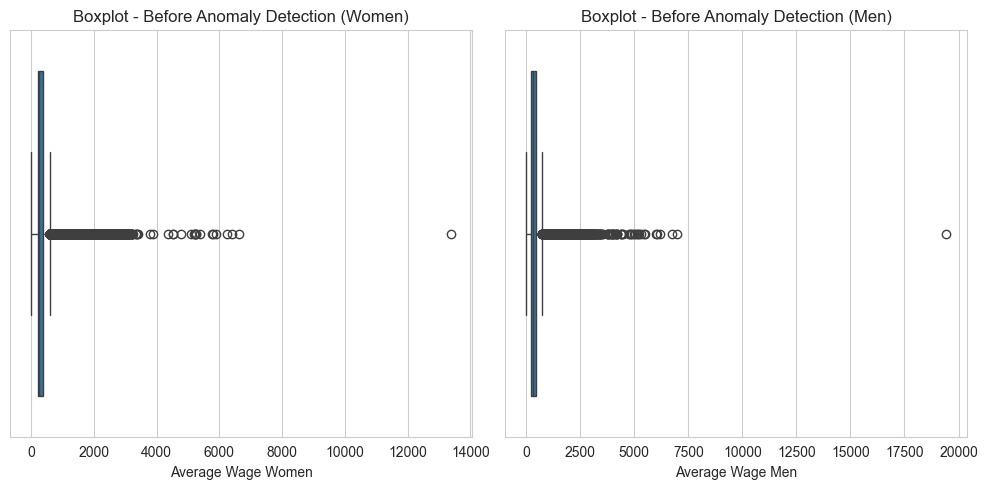

anomaly
 1    62961
-1     7650
Name: count, dtype: int64


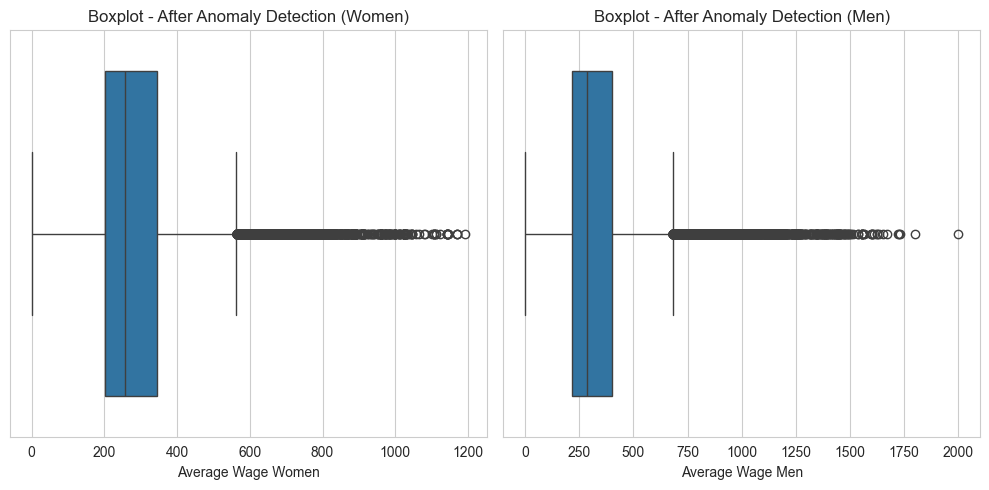

In [113]:
# before anomaly detection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=employment_translated, x='Average Wage Women', ax=ax1)
ax1.set_title('Boxplot - Before Anomaly Detection (Women)')

sns.boxplot(data=employment_translated, x='Average Wage Men', ax=ax2)
ax2.set_title('Boxplot - Before Anomaly Detection (Men)')

plt.tight_layout()
plt.show()

# export boxplot
fig.savefig('boxplot_before_anomaly_detection.png')


# Selecting numeric columns, exclude non-relevant columns like IDs or indices
numeric_cols = employment_translated.select_dtypes(include=['int64', 'float64']).columns.tolist()
from sklearn.ensemble import IsolationForest

# Initialize the IsolationForest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model to the dataset
iso_forest.fit(employment_translated[numeric_cols])

# Predict anomalies, where -1 indicates an anomaly and 1 indicates a normal observation
employment_translated['anomaly'] = iso_forest.predict(employment_translated[numeric_cols])

anomaly_counts = employment_translated['anomaly'].value_counts()
print(anomaly_counts)

anomalies = employment_translated[employment_translated['anomaly'] == -1]
# print(anomalies)
employment_no_anomalies = employment_translated[employment_translated['anomaly'] != -1].copy()

# After outlier detection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=employment_no_anomalies, x='Average Wage Women', ax=ax1)
ax1.set_title('Boxplot - After Anomaly Detection (Women)')

sns.boxplot(data=employment_no_anomalies, x='Average Wage Men', ax=ax2)
ax2.set_title('Boxplot - After Anomaly Detection (Men)')

plt.tight_layout()
plt.show()

# export boxplot
fig.savefig('boxplot_after_anomaly_detection.png')


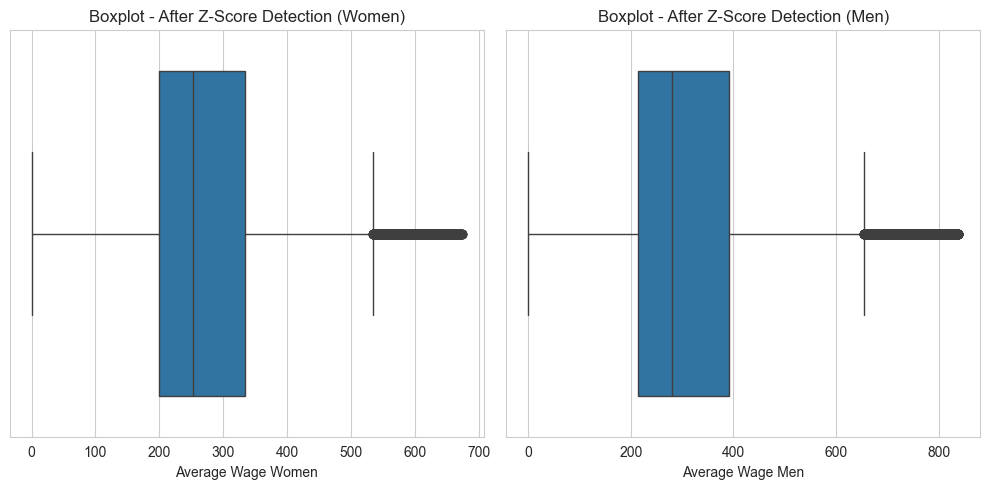

In [114]:
# Calculate the z-scores for "Average Wage Women" and "Average Wage Men" columns
z_scores = (employment_no_anomalies[['Average Wage Women', 'Average Wage Men']] - employment_no_anomalies[['Average Wage Women', 'Average Wage Men']].mean()) / employment_no_anomalies[['Average Wage Women', 'Average Wage Men']].std()

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

outliers = z_scores.abs() > threshold

employment_no_outliers = employment_no_anomalies[~outliers.any(axis=1)]

# After outlier detection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(data=employment_no_outliers, x='Average Wage Women', ax=ax1)
ax1.set_title('Boxplot - After Z-Score Detection (Women)')

sns.boxplot(data=employment_no_outliers, x='Average Wage Men', ax=ax2)
ax2.set_title('Boxplot - After Z-Score Detection (Men)')

plt.tight_layout()
plt.show()

# export boxplot
fig.savefig('boxplot_after_zscore_detection.png')


In [115]:
employment_no_outliers.shape

(61021, 14)

In [116]:
skewness_men = employment_no_outliers['Average Wage Men'].skew()
skewness_women = employment_no_outliers['Average Wage Women'].skew()

print("Skewness for 'Average Wage Men':", skewness_men)
print("Skewness for 'Average Wage Women':", skewness_women)

Skewness for 'Average Wage Men': 1.1019971369756332
Skewness for 'Average Wage Women': 1.0803609645376364


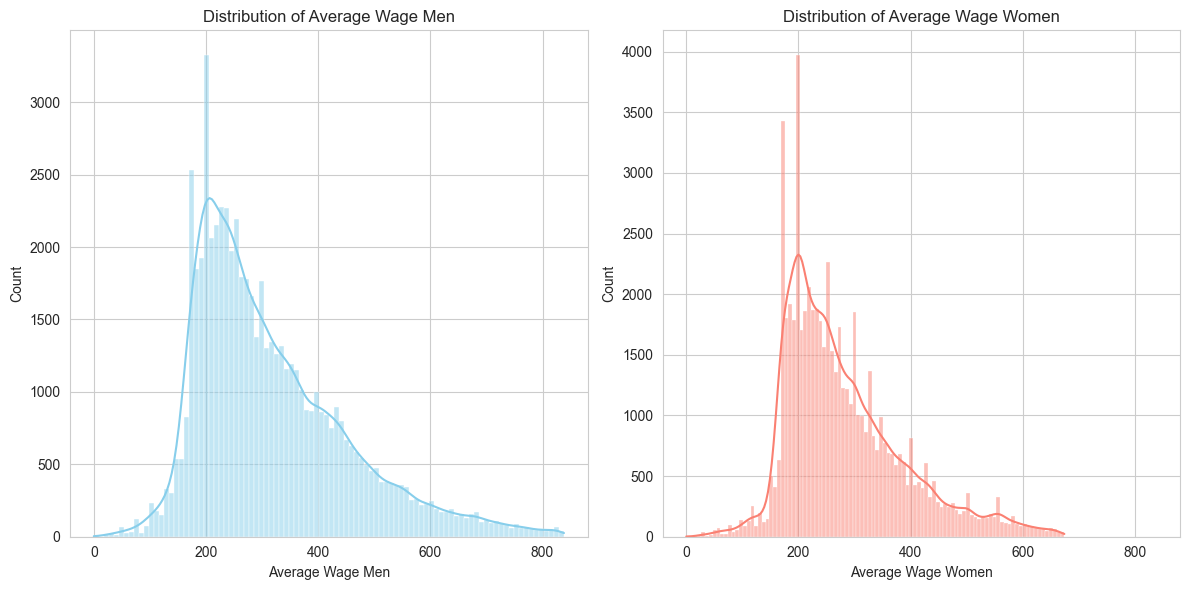

In [117]:
sns.set_style("whitegrid")

f, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

sns.histplot(employment_no_outliers['Average Wage Men'], color="skyblue", ax=axes[0], kde=True)
axes[0].set_title('Distribution of Average Wage Men')

sns.histplot(employment_no_outliers['Average Wage Women'], color="salmon", ax=axes[1], kde=True)
axes[1].set_title('Distribution of Average Wage Women')

plt.tight_layout()
plt.show()

# export histogram
f.savefig('histogram_average_wage.png')

                     Number of Employees       Men     Women  \
Number of Employees             1.000000  0.970827  0.824744   
Men                             0.970827  1.000000  0.665084   
Women                           0.824744  0.665084  1.000000   
Average Wage Men                0.196087  0.190368  0.161717   
Average Wage Women              0.168389  0.170191  0.123042   

                     Average Wage Men  Average Wage Women  
Number of Employees          0.196087            0.168389  
Men                          0.190368            0.170191  
Women                        0.161717            0.123042  
Average Wage Men             1.000000            0.665425  
Average Wage Women           0.665425            1.000000  


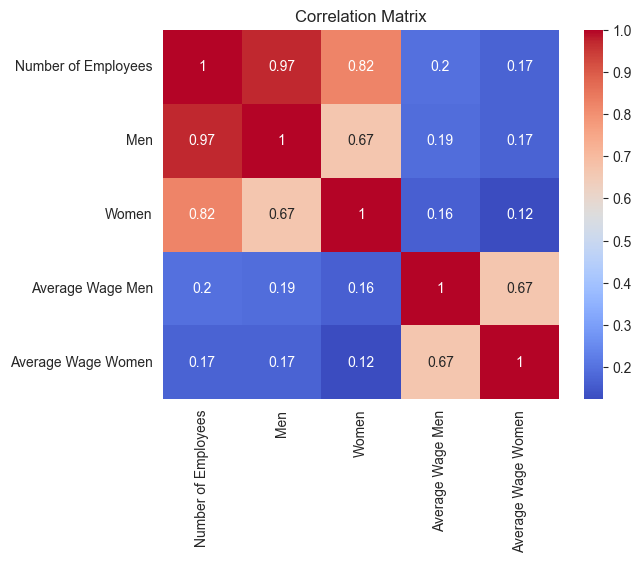

<Figure size 640x480 with 0 Axes>

In [118]:
import seaborn as sns
numerical_cols = ['Number of Employees', 'Men', 'Women', 'Average Wage Men', 'Average Wage Women']
correlation_matrix = employment_no_outliers[numerical_cols].corr()
print(correlation_matrix)

import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# export heatmap
plt.savefig('heatmap_correlation_matrix.png', bbox_inches='tight')


C:\Users\Festi\AppData\Local\Temp\ipykernel_18908\1231563697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_no_outliers['FemaleWageGreaterThanMale'] = (employment_no_outliers['Average Wage Women'] > employment_no_outliers['Average Wage Men']).astype(int)
C:\Users\Festi\AppData\Local\Temp\ipykernel_18908\1231563697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_no_outliers['Average Wage Women'] = pd.to_numeric(employment_no_outliers['Average Wage Women'], errors='coerce')
C:\U

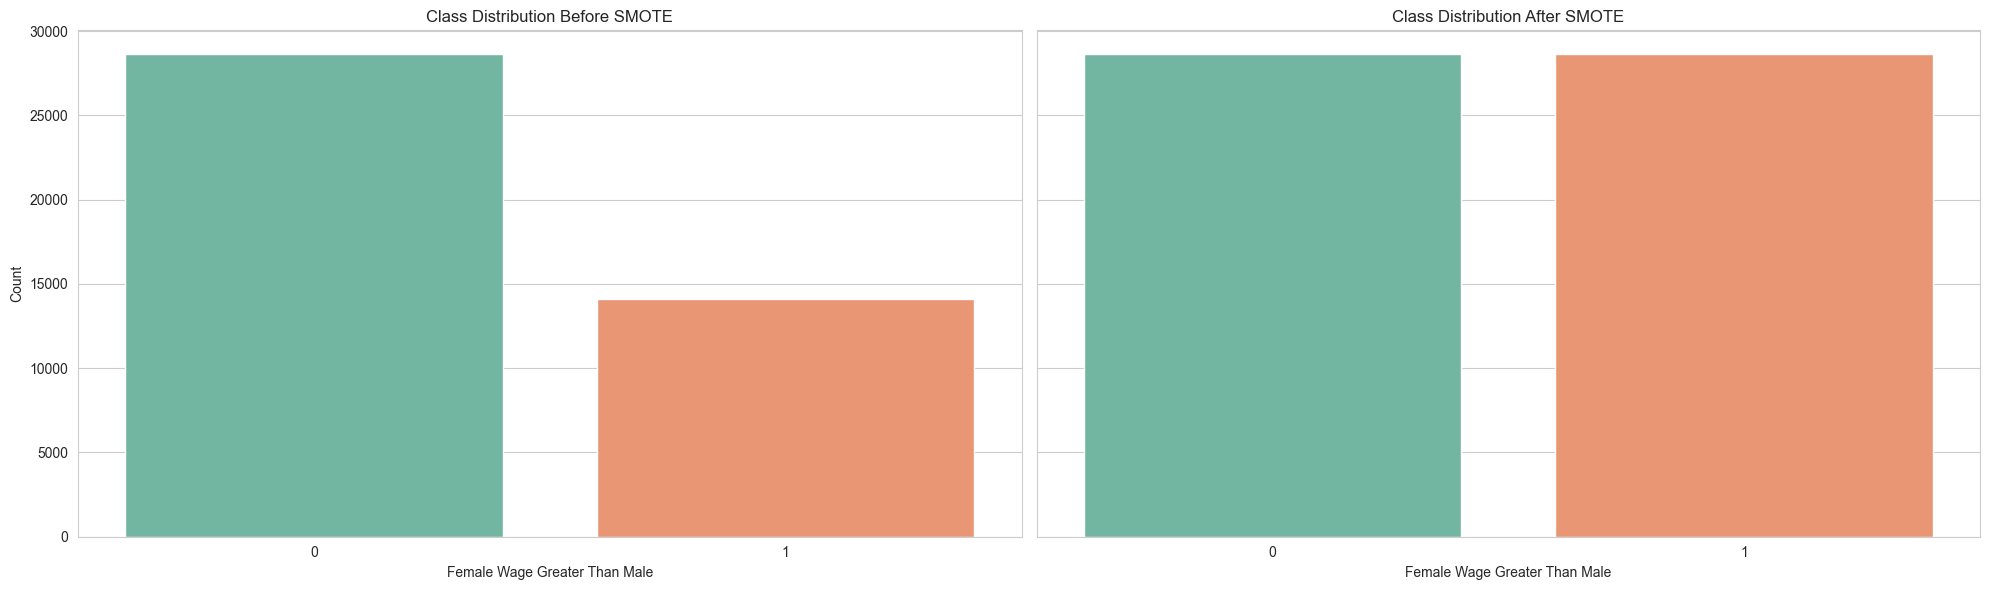

In [119]:
employment_no_outliers['FemaleWageGreaterThanMale'] = (employment_no_outliers['Average Wage Women'] > employment_no_outliers['Average Wage Men']).astype(int)

employment_no_outliers['Average Wage Women'] = pd.to_numeric(employment_no_outliers['Average Wage Women'], errors='coerce')
employment_no_outliers['Average Wage Men'] = pd.to_numeric(employment_no_outliers['Average Wage Men'], errors='coerce')

employment_no_outliers.dropna(subset=['Average Wage Women', 'Average Wage Men'], inplace=True)

X = employment_no_outliers[['Average Wage Women', 'Average Wage Men']]
y = employment_no_outliers['FemaleWageGreaterThanMale']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Class distribution before SMOTE
sns.countplot(x=y_train, ax=axes[0], palette='Set2')
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Female Wage Greater Than Male')
axes[0].set_ylabel('Count')

# Class distribution after SMOTE
sns.countplot(x=y_train_smote, ax=axes[1], palette='Set2')
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Female Wage Greater Than Male')

plt.tight_layout()
plt.show()


In [120]:
features = ['Sector Description', 'Registration Status', 'Municipality']
targets = ['Average Wage Men', 'Average Wage Women']

X = employment_no_outliers[features]
y = employment_no_outliers[targets]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)



In [121]:
train_set.shape

(36612, 5)

In [122]:
test_set.shape

(24409, 5)

In [123]:
test_set.head()     

,Sector Description,Registration Status,Municipality,Average Wage Men,Average Wage Women
85265,Sherbimet administrative dhe mbeshtetese,SH.P.K.,PEJË,464.99,376.86
85314,Industria nxjerrese,SH.P.K.,RAHOVEC,369.60,287.14
10173,Aktivitetet e tjera sherbyese,Bashkësi Fetare,OBILIQ,319.36,115.00
35647,Industria nxjerrese,SH.P.K.,ISTOG,204.55,183.00
68128,Arsimi,SH.P.K.,PEJË,488.67,411.80


In [124]:
train_set.head()

,Sector Description,Registration Status,Municipality,Average Wage Men,Average Wage Women
6864,Bujqesia;Pylltaria dhe Peshkimi,Individual,SKENDERAJ,169.72,164.74
22143,Akomodimi dhe sherbimi ushqimor,SH.P.K.,SKENDERAJ,200.74,199.33
32900,Furnizimi me uje; Kanalizimi; Aktivitetet e me...,Individual,PRISHTINË,225.00,350.00
81245,Aktivitetet e tjera sherbyese,Sindikatat,PRISHTINË,173.78,195.42
22900,Person Fizik,Person fizik,KAMENICË,205.50,205.53


In [ ]:
#Phase 2

In [125]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras import backend as K

# Function to calculate F1 score
def f1_score(precision, recall):
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# Load datasets
training_set = pd.read_csv('dataset/training_set.csv')
testing_set = pd.read_csv('dataset/testing_set.csv')

# Modify targets for classification: 1 if 'Average Wage Men' is above its median, else 0
median_wage = np.median(pd.concat([training_set['Average Wage Men'], testing_set['Average Wage Men']]))
y_train = (training_set['Average Wage Men'] > median_wage).astype(int)
y_test = (testing_set['Average Wage Men'] > median_wage).astype(int)

# Drop the original wage columns
X_train = training_set.drop(['Average Wage Women', 'Average Wage Men'], axis=1)
X_test = testing_set.drop(['Average Wage Women', 'Average Wage Men'], axis=1)

# Identify and encode categorical columns
categorical_cols = ['Sector Description', 'Registration Status', 'Municipality'] 
for col in categorical_cols:
    encoder = LabelEncoder()
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])

# Scale all features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model for binary classification
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with binary classification metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Recall(), Precision()])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_accuracy, test_recall, test_precision = model.evaluate(X_test, y_test)
test_f1 = f1_score(test_precision, test_recall)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Recall: {test_recall}")
print(f"Test Precision: {test_precision}")
print(f"Test F1 Score: {test_f1}")


Epoch 1/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.6478 - loss: 0.6348 - precision_3: 0.6443 - recall_3: 0.6478 - val_accuracy: 0.6791 - val_loss: 0.6094 - val_precision_3: 0.6457 - val_recall_3: 0.7673
Epoch 2/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6934 - loss: 0.5907 - precision_3: 0.6672 - recall_3: 0.7631 - val_accuracy: 0.6894 - val_loss: 0.5879 - val_precision_3: 0.6730 - val_recall_3: 0.7144
Epoch 3/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6951 - loss: 0.5819 - precision_3: 0.6729 - recall_3: 0.7582 - val_accuracy: 0.6908 - val_loss: 0.5830 - val_precision_3: 0.6714 - val_recall_3: 0.7248
Epoch 4/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6977 - loss: 0.5726 - precision_3: 0.6767 - recall_3: 0.7535 - val_accuracy: 0.6997 - val_loss: 0.5789 - val_precision_3: 0.6633 - val_recall_3: 0.7883
Epoch 5/20
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7077 - loss: 0.5648 - precision_3: 0.6851 - recall_

In [126]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score

# Assuming you already have your features (X_train, X_test) and labels (y_train, y_test) ready

# Convert the continuous target into a binary classification problem
# For example, classify if 'Average Wage Men' is above a specific threshold
threshold = np.median(y_train)  # Just as an example, using median as a threshold
y_train_class = (y_train > threshold).astype(int)
y_test_class = (y_test > threshold).astype(int)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train_class)
lr_predictions_continuous = lr_model.predict(X_test)

# Convert continuous predictions to binary predictions
lr_predictions = (lr_predictions_continuous > threshold).astype(int)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, lr_predictions)
recall = recall_score(y_test_class, lr_predictions)
precision = precision_score(y_test_class, lr_predictions)
f1 = f1_score(y_test_class, lr_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.5015567815589665
Recall: 1.0
Precision: 0.5015567815589665
F1 Score: 0.6680490377969369


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Logistic Regression Model for classification
log_model = LogisticRegression()
log_model.fit(X_train, y_train_class)
log_predictions = log_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, log_predictions)
recall = recall_score(y_test_class, log_predictions)
precision = precision_score(y_test_class, log_predictions)
f1 = f1_score(y_test_class, log_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.6470202654722237
Recall: 0.6693530821171858
Precision: 0.6420810697868784
F1 Score: 0.6554335075183961


In [128]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier for actual classification tasks
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train_class)
dtc_predictions = dtc_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, dtc_predictions)
recall = recall_score(y_test_class, dtc_predictions)
precision = precision_score(y_test_class, dtc_predictions)
f1 = f1_score(y_test_class, dtc_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.8821762167476921
Recall: 0.8673491614027445
Precision: 0.8945299337302033
F1 Score: 0.8807298866463921


In [129]:
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier for actual classification tasks
rfc_model = RandomForestClassifier(n_estimators=100)
rfc_model.fit(X_train, y_train_class)
rfc_predictions = rfc_model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, rfc_predictions)
recall = recall_score(y_test_class, rfc_predictions)
precision = precision_score(y_test_class, rfc_predictions)
f1 = f1_score(y_test_class, rfc_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.8821215928333425
Recall: 0.8711609671095621
Precision: 0.8913527969690216
F1 Score: 0.8811412205331571


In [130]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

# Support Vector Machine Model for classification
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train_class)  # y_train_class should be a binary label for classification
svm_predictions = svm_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, svm_predictions)
recall = recall_score(y_test_class, svm_predictions)
precision = precision_score(y_test_class, svm_predictions)
f1 = f1_score(y_test_class, svm_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.7036106407385153
Recall: 0.7685689392289261
Precision: 0.6813091330372659
F1 Score: 0.7223132036847493


In [131]:
from sklearn.neighbors import KNeighborsClassifier

# k-NN Model for classification
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train_class)  # y_train_class should be a binary label for classification
knn_predictions = knn_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, knn_predictions)
recall = recall_score(y_test_class, knn_predictions)
precision = precision_score(y_test_class, knn_predictions)
f1 = f1_score(y_test_class, knn_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.8618561206096029
Recall: 0.8574384665650185
Precision: 0.8658308589024525
F1 Score: 0.8616142270861833


In [132]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100)
gb_classifier.fit(X_train, y_train_class)  # Assuming y_train_class is prepared for classification
gb_predictions = gb_classifier.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test_class, gb_predictions)
recall = recall_score(y_test_class, gb_predictions)
precision = precision_score(y_test_class, gb_predictions)
f1 = f1_score(y_test_class, gb_predictions)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")


Accuracy: 0.7461626700169334
Recall: 0.765519494663472
Precision: 0.7381077391578285
F1 Score: 0.7515637530072173


In [133]:
#Phase 3
